In [12]:
from torch.utils.data import  DataLoader
from LIDC_data import LIDC_Dataset
import torch
import pandas as pd
import torchio as tio
import matplotlib.pyplot as plt
from torchvision.transforms import v2

In [61]:
prep_tr = [
    v2.Lambda(lambda x: torch.clamp(x,-1000,400)),
    # tio.Clamp(-1000,400),
    v2.Lambda(lambda x: (x+1000)/1400),
    # tio.RescaleIntensity((0,1), in_min_max=(-1000,400)),
    v2.CenterCrop((384,384)),
    # tio.CropOrPad((1,384,384),padding_mode='minimum')
]

aug_tr = [
    v2.RandomAffine(degrees=15),
    v2.RandomHorizontalFlip(),
    v2.GaussianNoise(0,0.1)
]
trans0 = v2.Compose( prep_tr + aug_tr )

In [ ]:
train_data = LIDC_Dataset('/data1/lidc-idri/slices',metapath='/data2/lijin/lidc-prep/kjs/splits/train_malB.csv',transform=trans0)
test_data = LIDC_Dataset('/data1/lidc-idri/slices',metapath='/data2/lijin/lidc-prep/kjs/splits/test_malB.csv')
total_train_data = len(train_data)
total_test_data = len(test_data)
print('total_train_data:',total_train_data, 'total_test_data:',total_test_data)

SyntaxError: unmatched ')' (172114851.py, line 1)

In [21]:
train_data[0][0].shape

torch.Size([1, 332, 332])

In [62]:
tfig = trans0(train_data[0][0])

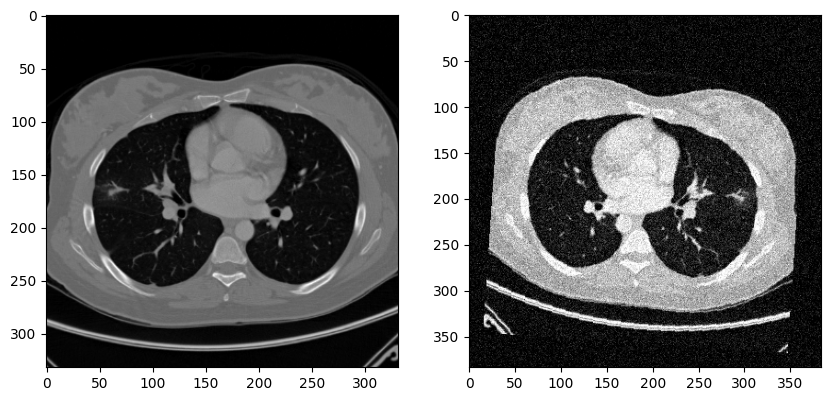

In [63]:
fig, axes = plt.subplots(1,2,figsize=(10, 5))
axes[0].imshow(train_data[0][0][0], cmap='gray')
axes[1].imshow(tfig[0], cmap='gray')

In [60]:
pd.Series(tfig[0].flatten()).describe()

count    147456.000000
mean          0.282737
std           0.346509
min           0.000000
25%           0.000000
50%           0.069286
75%           0.675000
max           1.000000
dtype: float64

In [ ]:
train_data[0][0]

In [65]:
trainloader = DataLoader(train_data, batch_size=16, shuffle=True)

In [66]:
d_iter = iter(trainloader)
batch = next(d_iter)
print(batch)

RuntimeError: stack expects each tensor to be equal size, but got [1, 312, 312] at entry 0 and [1, 349, 349] at entry 1